## Hamiltonian for Harmonic Oscillator

Solve for the dynamics of the harmonic oscillator, using a Hamiltonian formulation and a symplectic leapfrog scheme.

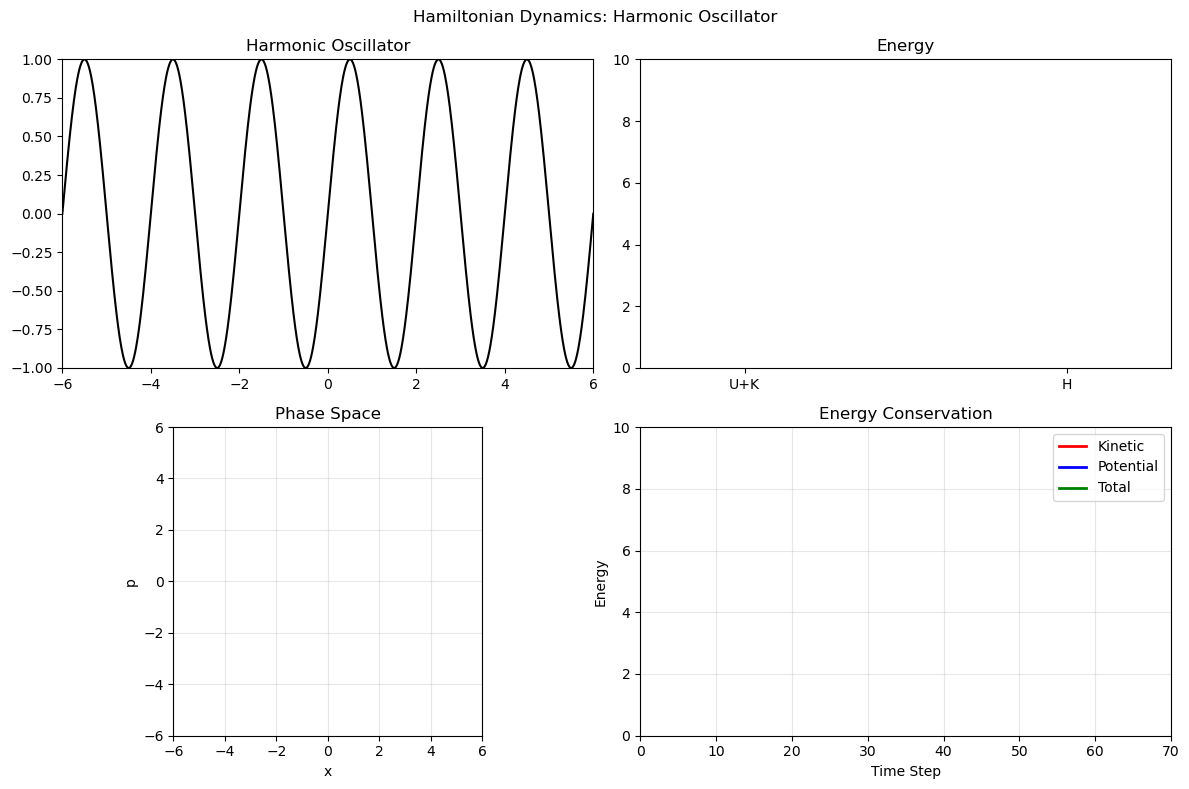

Initial position: -4.0000
Initial momentum: 1.0000
Final position: -2.3479
Final momentum: 3.3854
Initial total energy: 8.5000
Final total energy: 8.4869
Energy conservation error: 0.013109


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

#  SIMULATING HAMILTONIAN DYNAMICS
#  OF HARMONIC OSCILLATOR

# STEP SIZE
delta = 0.1
# NUMBER OF LEAPFROG STEPS
L = 70
# DEFINE KINETIC ENERGY FUNCTION
def K(p):
    return p**2 / 2
# DEFINE POTENTIAL ENERGY FUNCTION FOR SPRING (K = 1)
def U(x):
    return 0.5 * x**2
# DEFINE GRADIENT OF POTENTIAL ENERGY
def dU(x):
    return x

# INITIAL CONDITIONS
x0 = -4  # POSITION
p0 = 1   # MOMENTUM
# Pre-compute the entire trajectory using leapfrog integration
def compute_trajectory():
    x_traj = []
    p_traj = []    
    # FIRST HALF STEP FOR MOMENTUM
    p_step = p0 - delta/2 * dU(x0)    
    # FIRST FULL STEP FOR POSITION/SAMPLE
    x_step = x0 + delta * p_step    
    x_traj.append(x_step)
    p_traj.append(p_step)    
    # FULL STEPS
    for jL in range(L-1):
        # UPDATE MOMENTUM
        p_step = p_step - delta * dU(x_step)        
        # UPDATE POSITION
        x_step = x_step + delta * p_step       
        x_traj.append(x_step)
        p_traj.append(p_step)    
    # (LAST HALF STEP FOR MOMENTUM)
    p_step = p_step - delta/2 * dU(x_step)
    p_traj[-1] = p_step  # Update the last momentum value    
    return np.array(x_traj), np.array(p_traj)

# Compute the full trajectory
x_trajectory, p_trajectory = compute_trajectory()
# Setup the figure and subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Hamiltonian Dynamics: Harmonic Oscillator')
# Initialize plot elements
xx = np.linspace(-6, 6, 1000)
wave = np.sin(6*np.linspace(0, 2*np.pi, 1000))
# Subplot 1: Harmonic Oscillator visualization
ax1.set_xlim([-6, 6])
ax1.set_ylim([-1, 1])
ax1.set_title('Harmonic Oscillator')
line1, = ax1.plot(xx, wave, 'k-')
point1, = ax1.plot([], [], 'bo', markersize=15)
# Subplot 2: Energy bar chart
ax2.set_ylim([0, 10])
ax2.set_title('Energy')
ax2.set_xticks([0, 1])
ax2.set_xticklabels(['U+K', 'H'])
bars = ax2.bar([0, 1], [0, 0], width=0.5)
# Subplot 3: Phase Space
ax3.set_xlim([-6, 6])
ax3.set_ylim([-6, 6])
ax3.set_aspect('equal')
ax3.set_xlabel('x')
ax3.set_ylabel('p')
ax3.set_title('Phase Space')
ax3.grid(True, alpha=0.3)
trajectory_line, = ax3.plot([], [], 'k-', alpha=0.5, linewidth=1)
current_point, = ax3.plot([], [], 'ro', markersize=10)
# Subplot 4: Energy vs Time
ax4.set_xlim([0, L])
ax4.set_ylim([0, 10])
ax4.set_xlabel('Time Step')
ax4.set_ylabel('Energy')
ax4.set_title('Energy Conservation')
ax4.grid(True, alpha=0.3)
kinetic_line,   = ax4.plot([], [], 'r-', label='Kinetic', linewidth=2)
potential_line, = ax4.plot([], [], 'b-', label='Potential', linewidth=2)
total_line,     = ax4.plot([], [], 'g-', label='Total', linewidth=2)
ax4.legend()

plt.tight_layout()
# Animation function
def animate(frame):
    if frame >= len(x_trajectory):
        return   
    x_current = x_trajectory[frame]
    p_current = p_trajectory[frame]    
    # Update oscillator visualization
    xx_current = np.linspace(-6, x_current, 1000)
    line1.set_data(xx_current, wave[:len(xx_current)])
    point1.set_data([x_current + 0.5], [0])    
    # Update energy bars
    potential_energy = U(x_current)
    kinetic_energy = K(p_current)
    total_energy = potential_energy + kinetic_energy    
    # Clear and redraw bars (matplotlib bar animation workaround)
    ax2.clear()
    ax2.bar([0], [potential_energy], 0.4, label='Potential', color='blue', alpha=0.7)
    ax2.bar([0], [kinetic_energy], 0.4, bottom=[potential_energy], label='Kinetic', color='red', alpha=0.7)
    ax2.bar([1], [total_energy], 0.4, label='Total', color='green', alpha=0.7)
    ax2.set_ylim([0, 10])
    ax2.set_xticks([0, 1])
    ax2.set_xticklabels(['U+K', 'H'])
    ax2.set_title('Energy')
    ax2.legend()    
    # Update phase space
    trajectory_line.set_data(x_trajectory[:frame+1], p_trajectory[:frame+1])
    current_point.set_data([x_current], [p_current])    
    # Update energy vs time plot
    time_steps = np.arange(frame + 1)
    kinetic_energies = [K(p) for p in p_trajectory[:frame+1]]
    potential_energies = [U(x) for x in x_trajectory[:frame+1]]
    total_energies = [ke + pe for ke, pe in zip(kinetic_energies, potential_energies)]    
    kinetic_line.set_data(time_steps, kinetic_energies)
    potential_line.set_data(time_steps, potential_energies)
    total_line.set_data(time_steps, total_energies)

# Create and run animation
anim = FuncAnimation(fig, animate, frames=len(x_trajectory), interval=100, repeat=True, blit=False)
# Display the animation
plt.show()
# Print summary statistics
print(f"Initial position: {x0:.4f}")
print(f"Initial momentum: {p0:.4f}")
print(f"Final position: {x_trajectory[-1]:.4f}")
print(f"Final momentum: {p_trajectory[-1]:.4f}")
print(f"Initial total energy: {U(x0) + K(p0):.4f}")
print(f"Final total energy: {U(x_trajectory[-1]) + K(p_trajectory[-1]):.4f}")
print(f"Energy conservation error: {abs((U(x_trajectory[-1]) + K(p_trajectory[-1])) - (U(x0) + K(p0))):.6f}")

# Uncomment the line below to save the animation as a GIF
# anim.save('harmonic_oscillator.gif', writer='pillow', fps=10)

In [2]:
anim.save('harmonic_oscillator.gif', writer='pillow', fps=10)